<div class="alert alert-block alert-success">
    <h1 align="center">Multiple Lienar regression</h1>
    <h4 align="center"><a href="https://mohammadamirifard.com/">Mohammad Amirifard</a></h5>
</div>

### Problem:
You are an owner of a bike shop.You rent bicycles to customers. Now you want to predict the the number of requsets for bicycles by custonmers based on some information you have. So this is a kind of linear regression with multiple features.

Let's get started with some inforrmation related to culomns exited in the dataset.

##### datetime:
hourly date + timestamp  
##### season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 
##### holiday:
whether the day is considered a holiday
##### workingday:
whether the day is neither a weekend nor holiday
##### weather:
(1 = Clear, Few clouds, Partly cloudy, Partly cloudy)(2 =  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) (3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
(4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
##### temp:
temperature in Celsius
##### atemp:
"feels like" temperature in Celsius
##### humidity:
relative humidity
##### windspeed:
wind speed
##### casual:
number of non-registered user rentals initiated
##### registered:
number of registered user rentals initiated
##### count:
number of total rentals


<div class="alert alert-block alert-success">
    <h1 align="center">Let's get started</h1>
    <h2 align="center">Step1: Import libararies and load dataset</h2>
</div> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data_test =  pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<div class="alert alert-block alert-success">
    <h2 align="center">Step2: EDA & Visualization</h2>
</div> 

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
data_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# As we understood, there is no null value in our data. Great Luck
# No we must change the type of columns to suitable value to use less memory
for i in data_train.columns:
    if i== 'datetime': # Here I decided to split date form time in first column and create two new cloumns
        data_train[f'{i}'] = data_train[f'{i}'].astype('datetime64')
        data_train['date'] = [d.date() for d in data_train['datetime']]
        data_train['time'] = [d.time() for d in data_train['datetime']]
        # In this step, I change the order of columns:
        data_train = data_train[['date','time', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',]]
    elif i in ['temp','atemp', 'windspeed']:
        data_train[f'{i}'] = data_train[f'{i}'].astype('float16')
    else:
        data_train[f'{i}'] = data_train[f'{i}'].astype('int16')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10886 non-null  object 
 1   time        10886 non-null  object 
 2   season      10886 non-null  int16  
 3   holiday     10886 non-null  int16  
 4   workingday  10886 non-null  int16  
 5   weather     10886 non-null  int16  
 6   temp        10886 non-null  float16
 7   atemp       10886 non-null  float16
 8   humidity    10886 non-null  int16  
 9   windspeed   10886 non-null  float16
 10  casual      10886 non-null  int16  
 11  registered  10886 non-null  int16  
 12  count       10886 non-null  int16  
dtypes: float16(3), int16(8), object(2)
memory usage: 404.1+ KB


In [7]:
# Weel down, we could optimize the useage of memory

In [8]:
data_train.head(3)

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,1,0,0,1,9.843750,14.398438,81,0.0,3,13,16
1,2011-01-01,01:00:00,1,0,0,1,9.023438,13.632812,80,0.0,8,32,40
2,2011-01-01,02:00:00,1,0,0,1,9.023438,13.632812,80,0.0,5,27,32


In [9]:
# Summary Statistics
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04,1.088600e+04,10886.000000,1.088600e+04,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,inf,inf,61.886460,inf,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.789062e+00,8.476562e+00,19.245033,8.164062e+00,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,8.198242e-01,7.597656e-01,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,1.393750e+01,1.667188e+01,47.000000,7.000000e+00,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,2.050000e+01,2.423438e+01,62.000000,1.300000e+01,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,2.623438e+01,3.106250e+01,77.000000,1.700000e+01,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,4.100000e+01,4.546875e+01,100.000000,5.700000e+01,367.000000,886.000000,977.000000


In [10]:
# Here I want to compare the total number of rentals in each season
number_of_rentals_in_each_season = []
for i in (data_train.season.unique()):
    number_of_rentals_in_each_season.append(data_train[data_train.season==i]['count'].sum())
print('number of rentals in each season:  : ',number_of_rentals_in_each_season)

number of rentals in each season:  :  [312498, 588282, 640662, 544034]


We understand that the number of total rentals in fall season is more than other seasons


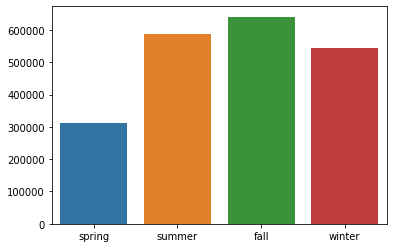

In [11]:
sns.barplot(x=['spring','summer','fall','winter'], y=number_of_rentals_in_each_season)
print('We understand that the number of total rentals in fall season is more than other seasons')

In [12]:
# Here I want to compare the total number of rentals based on holidays
number_of_rentals= []
for i in (data_train.holiday.unique()):
    number_of_rentals.append(data_train[data_train.holiday==i]['count'].sum())
print('number of rentals:  : ',number_of_rentals)

number of rentals:  :  [2027668, 57808]


We understand that the number of total rentals in fall season is more than other seasons


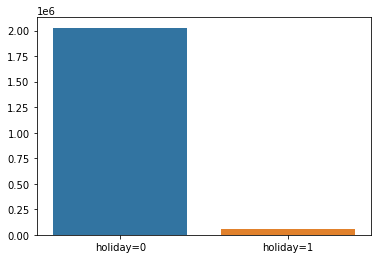

In [13]:
sns.barplot(x=['holiday=0','holiday=1'], y=number_of_rentals)
print('We understand that the number of total rentals in fall season is more than other seasons')

In [14]:
# Here I want to compare the total number of rentals based on holidays
number_of_rental= []
for i in (data_train.workingday.unique()):
    number_of_rental.append(data_train[data_train.workingday==i]['count'].sum())
print('number of rentals:  : ',number_of_rental)

number of rentals:  :  [654872, 1430604]


We understand that the number of total rentals in fall season is more than other seasons


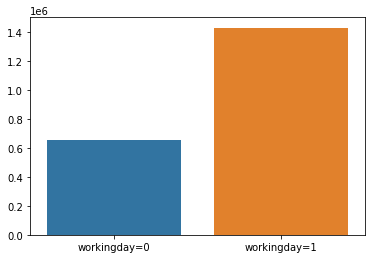

In [15]:
sns.barplot(x=['workingday=0','workingday=1'], y=number_of_rental)
print('We understand that the number of total rentals in fall season is more than other seasons')

In [24]:
data_train['count'].max()


977

In [25]:
data_train[data_train['count']  == data_train['count'].max()]

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12,18:00:00,3,0,1,1,27.0625,31.0625,44,17.0,91,886,977


In [ ]:
# Here I want to compare the total number of rentals based on holidays
number_of_rental= []
for i in (data_train.w.unique()):
    number_of_rental.append(data_train[data_train.workingday==i]['count'].sum())
print('number of rentals:  : ',number_of_rental)
sns.barplot(x=['workingday=0','workingday=1'], y=number_of_rental)
print('We understand that the number of total rentals in fall season is more than other seasons')